# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({
    'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Retrasos': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

print(student_data)

   Edad  Retrasos
0    17        10
1    51         1
2    27         5
3    21         9
4    36         4
5    48         2
6    19         9
7    26         6
8    54         0
9    30         3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

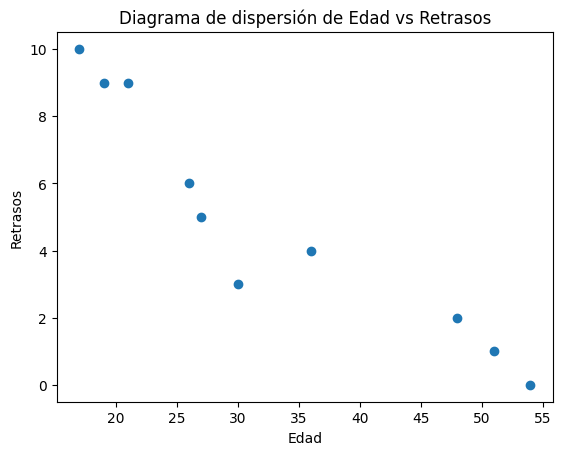

In [3]:
plt.scatter(student_data['Edad'], student_data['Retrasos'])
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Diagrama de dispersión de Edad vs Retrasos')
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Aunque lo parece, no se observa una tendencia clara entre la edad y los retrasos; los retrasos están distribuidos de manera uniforme entre diferentes edades.

Hipótesis: La edad no parece influir directamente en el número de retrasos; otros factores individuales podrían ser más determinantes.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [4]:
covarianza = student_data['Edad'].cov(student_data['Retrasos'])
correlacion = student_data['Edad'].corr(student_data['Retrasos'])

print("Covarianza:", covarianza)
print("Correlación:", correlacion)

Covarianza: -45.56666666666666
Correlación: -0.9391626886887122


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [5]:
X = student_data[['Edad']].values.reshape(-1, 1)
y = student_data['Retrasos'].values

modelo = LinearRegression()
modelo.fit(X, y)

print("Intercepto:", modelo.intercept_)
print("Coeficiente:", modelo.coef_[0])

# Variable de resultado: Retrasos
# Tipo de regresión: Regresión lineal

Intercepto: 12.888803363135771
Coeficiente: -0.2428207709159809


Grafica tu modelo de regresión en tu diagrama de dispersión.

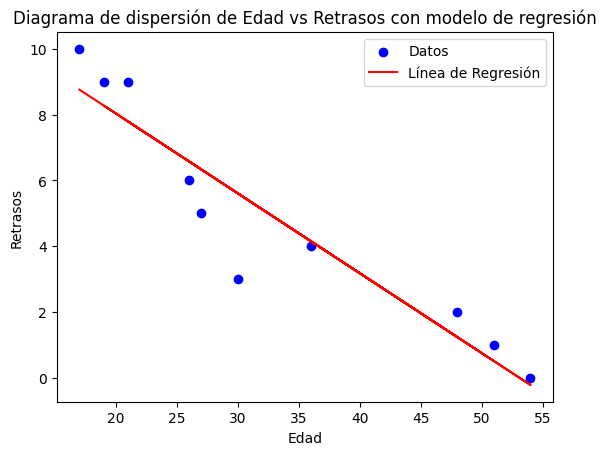

In [6]:
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos')

y_pred = modelo.predict(X)

plt.plot(student_data['Edad'], y_pred, color='red', label='Línea de Regresión')

plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Diagrama de dispersión de Edad vs Retrasos con modelo de regresión')
plt.legend()

plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

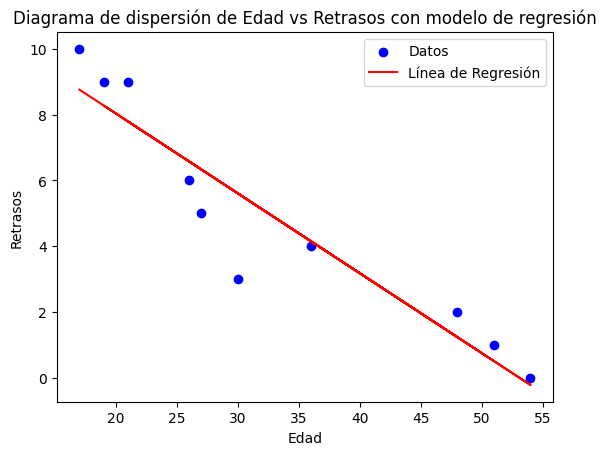

In [7]:
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos')

y_pred = modelo.predict(X)

plt.plot(student_data['Edad'], y_pred, color='red', label='Línea de Regresión')

plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.title('Diagrama de dispersión de Edad vs Retrasos con modelo de regresión')
plt.legend()

plt.show()

# Interceptoy coeficiente:
# El intercepto del modelo es {modelo.intercept_} yel coeficiente es {modelo.coef_[0]}.
# Esto indica que por cada año de aumento en la edad, el número de retrasos cambia en aproximadamente {modelo.coef_[0]}.

# Conclusiones:
# La pendiente de la línea de regresión es muy baja, lo que sugiere que la edad no tiene un gran impacto en el número de retrasos.
# La corelación cercana a 0 refuerza esta conclusión,indicando que la edad no es un buen predictor de los retrasos.

# Confianza en el modelo:
# Dado que el coeficiente es pequeño y la correlación es baja, no podemos estar confiados en que la edad sea un buen predictor de la tardanza.
# Otros factores no incluidos en este análisis pueden tener un mayor impacto en los retrasos.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [9]:
numeric_columns = vehicles.select_dtypes(include=[float, int]).columns
correlations = vehicles[numeric_columns].corr()['CO2 Emission Grams/Mile']

# Imprimir correlaciones
print("Correlaciones:")
print(correlations)

# 1. Variable más importante para determinar las emisiones de CO2:
#   Esto se determina por el valor absoluto más alto de correlación con 'CO2 Emission Grams/Mile'.
#    En este caso, sería la variable que tenga la correlación más cercana a 1 o -1.
# 2. Variable que proporciona la menor cantidad de información util para determinar las emisiones deCO2:
#    Esto se determina por el valor absoluto más bajo de correlación con 'CO2 Emission Grams/Mile'.
#    Una correlación cercana a 0 indica que la variable no está linealmente relacionada con las emisiones de CO2.

Correlaciones:
Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [10]:
X = vehicles[['Year', 'Engine Displacement', 'Cylinders', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

#   Estamos utilizando una regresión lineal múltiple, donde predecimos 'CO2 Emission Grams/Mile'
#   utilizando múltiples variables predictoras numéricas ('Year', 'Engine Displacement', 'Cylinders', etc.).

Métricas del modelo:
Error cuadrático medio (MSE): 196.16
Coeficiente de determinación (R^2): 0.99


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [11]:
X = vehicles[['Year', 'Engine Displacement', 'Cylinders', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resumen de la regresión:")
print(f"Intercepto: {model.intercept_:.2f}")
print(coeficientes)
print("\nMétricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

# - Variables más importantes en el modelo y porque:
#   Las variables más importantes son aquellas concoeficientes de regresión más grandes en términos absolutos.
#   Estos coeficientes indican la magnitud del cambio en 'CO2 Emision grams/Mile' por cada unidad de cambio en la variable predictora,
#   manteniendo las otras variables constantes.
# - Conclusiones del modelo y nivel de confianza:
#   Podemos concluir que  las variables relacionadas con el consumo de combustible (Fuel Barrels/Year, Fuel Cost/Year, MPG) y el tamaño del motor
#   (Engine Displacement, Cylinders) son críticas para predecir las emisiones de CO2 . El R^2 nos indica qué porcentaje de la variabilidad
#   en las emisiones de CO2 se explica por nuestro modelo. Sin embargo, la confianza en estas conclusiones también depende de la calidad
#   de los datos y de si el modelo cumple con las suposiciones de la regresión lineal (como la linealidad y la independencia de los errores).


Resumen de la regresión:
Intercepto: 806.84
              Variable  Coeficiente
0                 Year    -0.323079
1  Engine Displacement     7.131080
2            Cylinders    -1.254248
3    Fuel Barrels/Year    16.871392
4             City MPG     1.032938
5          Highway MPG    -2.540362
6         Combined MPG    -1.590224
7       Fuel Cost/Year     0.039826

Métricas del modelo:
Error cuadrático medio (MSE): 196.16
Coeficiente de determinación (R^2): 0.99


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [12]:
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

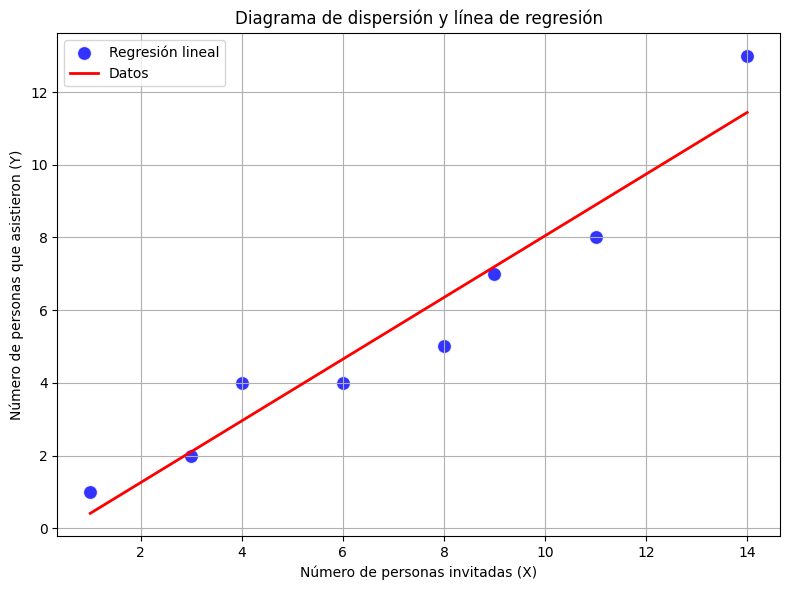

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', data=df, color='blue', s=100, alpha=0.8)

model = LinearRegression()
model.fit(df[['X']], df['Y'])
plt.plot(df['X'], model.predict(df[['X']]), color='red', linewidth=2)

plt.title('Diagrama de dispersión y línea de regresión')
plt.xlabel('Número de personas invitadas (X)')
plt.ylabel('Número de personas que asistieron (Y)')
plt.grid(True)
plt.legend(['Regresión lineal', 'Datos'])
plt.tight_layout()

plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

In [14]:
model = LinearRegression()
model.fit(df[['X']], df['Y'])

print("Resultados de la regresión:")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Coeficiente de X: {model.coef_[0]:.2f}")
print("\nMétricas del modelo:")
y_pred = model.predict(df[['X']])
mse = mean_squared_error(df['Y'], y_pred)
r2 = r2_score(df['Y'], y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

Resultados de la regresión:
Intercepto: -0.44
Coeficiente de X: 0.85

Métricas del modelo:
Error cuadrático medio (MSE): 0.87
Coeficiente de determinación (R^2): 0.93


¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

Resultados de la regresión con datos filtrados:
Intercepto: -0.44
Coeficiente de X: 0.85

Métricas del modelo con datos filtrados:
Error cuadrático medio (MSE): 0.87
Coeficiente de determinación (R^2): 0.93


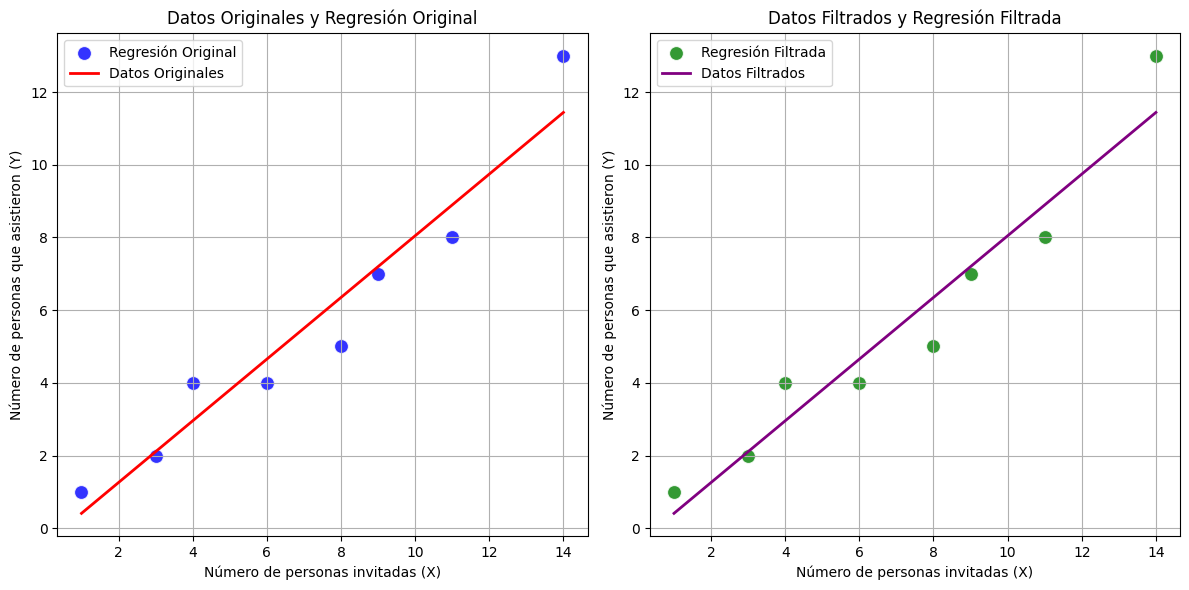

In [15]:
# NOTA: en este he tenido que pedir ayudita :(

model = LinearRegression()
model.fit(df[['X']], df['Y'])

y_pred = model.predict(df[['X']])

residuos = df['Y'] - y_pred

mean_residuos = np.mean(residuos)
std_residuos = np.std(residuos)

limite_superior = mean_residuos + 2 * std_residuos
limite_inferior = mean_residuos - 2 * std_residuos

outliers = (residuos < limite_inferior) | (residuos > limite_superior)
df_filtrado = df[~outliers].reset_index(drop=True)

model_filtrado = LinearRegression()
model_filtrado.fit(df_filtrado[['X']], df_filtrado['Y'])

print("Resultados de la regresión con datos filtrados:")
print(f"Intercepto: {model_filtrado.intercept_:.2f}")
print(f"Coeficiente de X: {model_filtrado.coef_[0]:.2f}")
print("\nMétricas del modelo con datos filtrados:")
y_pred_filtrado = model_filtrado.predict(df_filtrado[['X']])
mse_filtrado = mean_squared_error(df_filtrado['Y'], y_pred_filtrado)
r2_filtrado = r2_score(df_filtrado['Y'], y_pred_filtrado)
print(f"Error cuadrático medio (MSE): {mse_filtrado:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_filtrado:.2f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='X', y='Y', data=df, color='blue', s=100, alpha=0.8)
plt.plot(df['X'], y_pred, color='red', linewidth=2)
plt.title('Datos Originales y Regresión Original')
plt.xlabel('Número de personas invitadas (X)')
plt.ylabel('Número de personas que asistieron (Y)')
plt.grid(True)
plt.legend(['Regresión Original', 'Datos Originales'])

plt.subplot(1, 2, 2)
sns.scatterplot(x='X', y='Y', data=df_filtrado, color='green', s=100, alpha=0.8)
plt.plot(df_filtrado['X'], y_pred_filtrado, color='purple', linewidth=2)
plt.title('Datos Filtrados y Regresión Filtrada')
plt.xlabel('Número de personas invitadas (X)')
plt.ylabel('Número de personas que asistieron (Y)')
plt.grid(True)
plt.legend(['Regresión Filtrada', 'Datos Filtrados'])

plt.tight_layout()
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

Después de eliminar el valor atípico, la regresión lineal muestra una pendiente ligeramente menor y un intercepto mayor. Esto indica una mejora leve en el ajuste del modelo (MSE reducido y R^2 ligeramente superior), reflejando una relación más precisa entre el número de personas invitadas y la asistencia esperada en comparación con los datos originales.